<a href="https://colab.research.google.com/github/costa-douglas/data_analyst/blob/main/AC3_Douglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nome: Douglas Pereira da Costa - RA: 1904869

#Imports

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mlp
import seaborn as sns
import plotly.express as px
import math
import statistics
from matplotlib import pyplot

#Variável para ler o DataFrame

1.   Item da lista
2.   Item da lista

---





In [4]:
dados = pd.read_csv('Douglas_Pereira_da_Costa.csv', sep=';', encoding='UTF-8')

#Trasformar a coluna Zero Km em String

In [5]:
dados['zero_km'] = dados['zero_km'].map({True: 'Sim', False: 'Não'})  

# Exercício 1 - Dados perdidos

    1) Quantos missings totais possui sua base de dados?
    R: 176;
    2) Quantas variáveis apresentaram valores perdidos?
    R: 2 (Ano e Valor);
    3) Mostre em algum das visões que aprendemos com o missingno
    4) Qual será o tratamento dado para os dados perdidos e por quê?
    R: Imputação de mediana, devido os dados perdidos serem do tipo MAR.

#Verificando variáveis com valores nulos

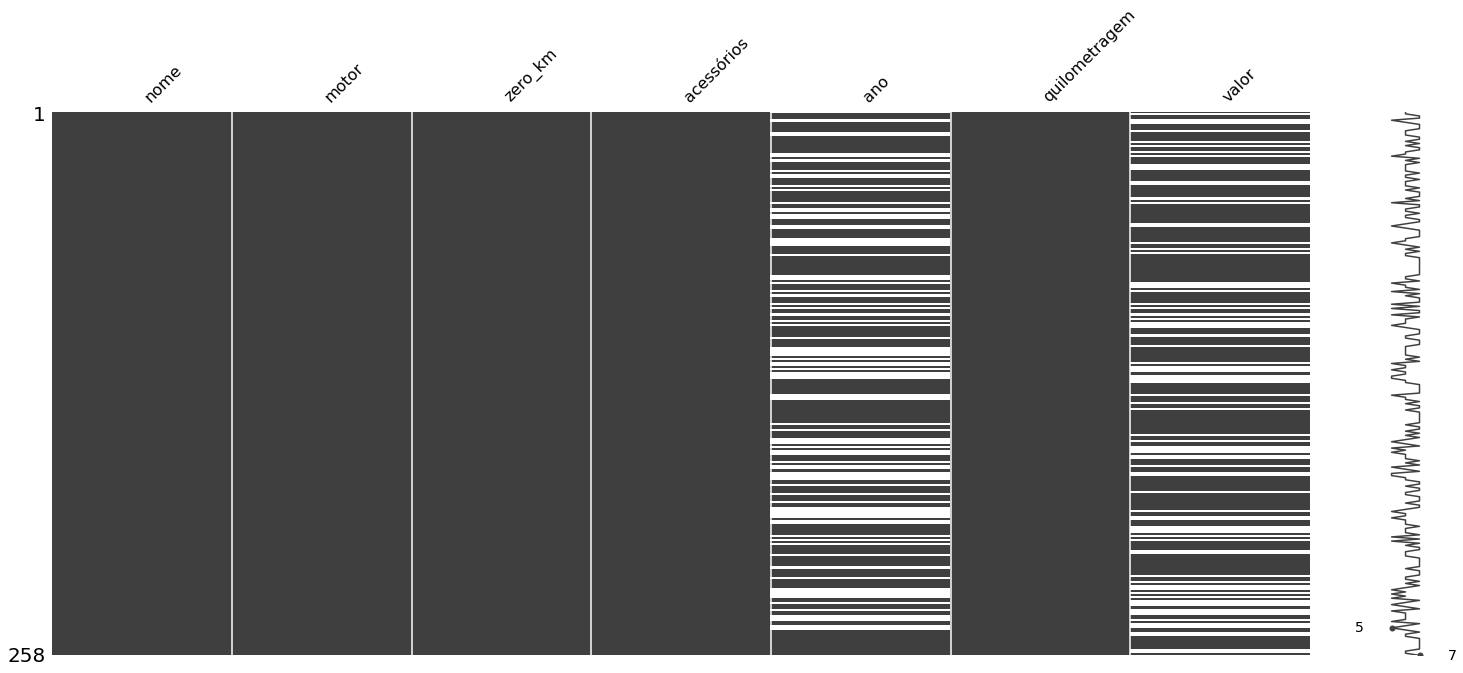

In [6]:
msno.matrix(dados)

#Somando para saber quantos valores nulos a tabela possui

In [ ]:
dados.isnull().sum()

nome              0
motor             0
zero_km           0
acessórios        0
ano              92
quilometragem     0
valor            84
dtype: int64

#Tratando as variáveis com valores nulos

In [ ]:
medianaAno = dados.ano.median()
medianaValor = dados.valor.median()
dados.ano.fillna(medianaAno, inplace=True)
dados['valor'].fillna(medianaValor, inplace = True)

#Tabela sem os valores nulos

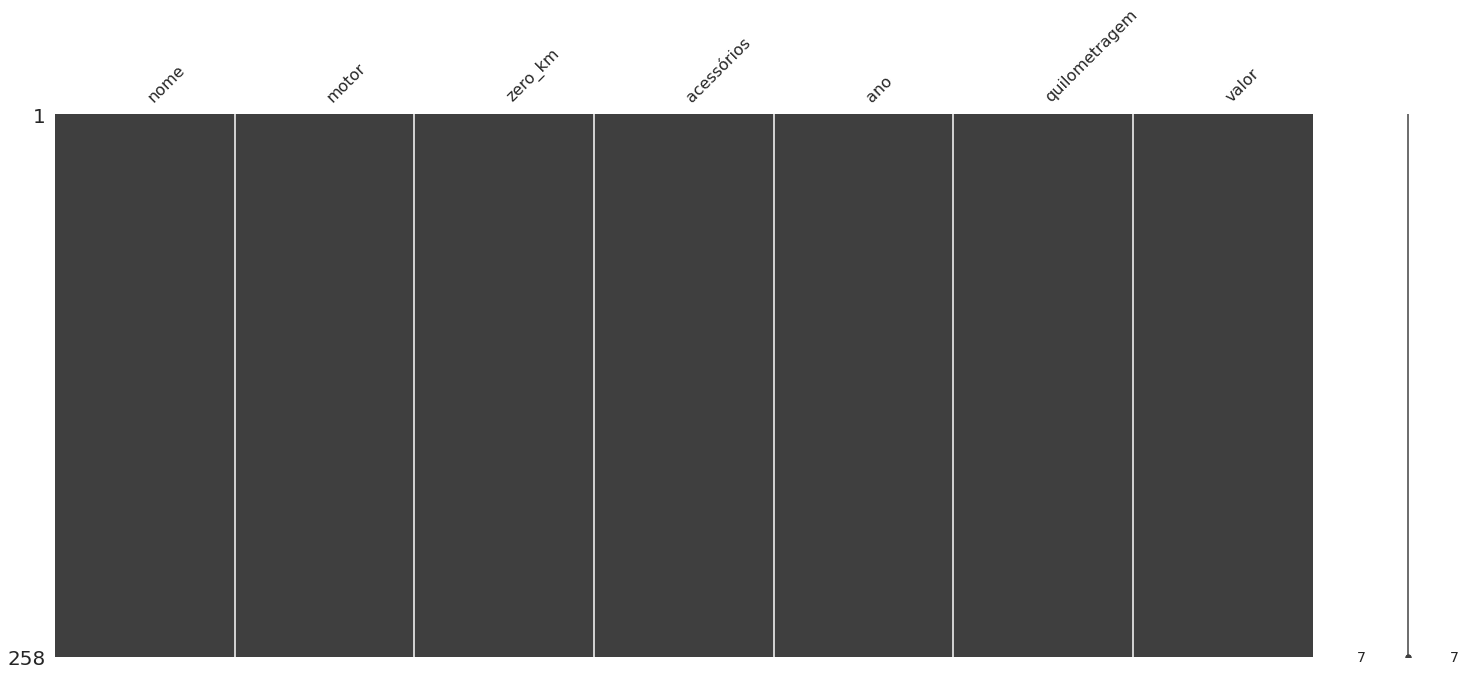

In [ ]:
msno.matrix(dados)

# Exercício 2 - Outliers

    1) Mostre um gráfico de caixa de cada variável numérica
    2) Qual tratamento você dará para os outliers e por quê?
    R:Variável ano e quilometragem foram aproximados dos limites inferiores e superiores pois a maioria dos dados estão nesse limite.
    Variável valor não precisou de tratamento pois não tem outliers.

#Variável Ano

In [ ]:
dados.ano[dados.ano < 1993] = 1993

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
px.box(dados.ano)

#Variável Quilometragem

In [ ]:
dados.quilometragem[dados.quilometragem > 96000] = 96000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados.quilometragem[dados.quilometragem < 9000] = 9000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
px.box(dados.quilometragem)

#Variável valor

In [ ]:
px.box(dados.valor)

# Exercício 3 - Medidas resumo

    1) Para as variáveis numéricas, mostre: 
        a) média
        b) mediana
        c) percentis 25 e 75
        d) mínimo e máximo
    2) Para as variáveis categoricas, retorne a frequência delas

#Calculando a média

In [ ]:
def media(coluna):
  soma = 0
  contagem = 0
  for linha in coluna:
    soma = soma + linha
    contagem += 1
  media = soma / contagem
  return media

#Calculando a média, mediana, percentis 25 e 75, mínimo e máximo das variáveis numéricas

In [ ]:
from numpy.ma.extras import median
m1 = dados['ano'].mean()
print(f'A média do ano dos veículos é de {m1:.0f}')

mediana = dados['ano'].median()
print(f'A mediana do ano dos veículos é de {mediana:.0f}')

array_ano = np.array(dados['ano'], dtype=int)

percentilano = np.percentile(array_ano, 25)
print(f'O percentil 25 do ano é de {percentilano:.2f}')

percentilano75 = np.percentile(array_ano, 75)
print(f'O percentil 75 do ano é de {percentilano75:.2f}')

min = dados.ano.min()
print(f'O valor mínimo para o ano é {min:.0f}')
max = dados.ano.max()
print(f'O valor máximo para o ano é {max:.0f}')

A média do ano dos veículos é de 2007
A mediana do ano dos veículos é de 2007
O percentil 25 do ano é de 2005.00
O percentil 75 do ano é de 2012.75
O valor mínimo para o ano é 1990
O valor máximo para o ano é 2019


In [ ]:
m2 = dados['quilometragem'].mean()
print(f'A média de quilometragem dos veículos é de {m2:.0f}')

mediana = dados['quilometragem'].median()
print(f'A mediana de quilometragem dos veículos é de {mediana:.0f}')

array_KM = np.array(dados['quilometragem'], dtype=int)

percentilKM25 = np.percentile(array_KM, 25)
print(f'O percentil 25 da quilometragem é de {percentilKM25:.2f}')

percentilKM75 = np.percentile(array_KM, 75)
print(f'O percentil 75 da quilometragem é de {percentilKM75:.2f}')

min = dados.quilometragem.min()
print(f'O valor mínimo para a quilometragem é {min:.0f}')
max = dados.quilometragem.max()
print(f'O valor máximo para a quilometragem é {max:.0f}')


A média de quilometragem dos veículos é de 54978
A mediana de quilometragem dos veículos é de 52987
O percentil 25 da quilometragem é de 43073.50
O percentil 75 da quilometragem é de 64564.25
O valor mínimo para a quilometragem é 610
O valor máximo para a quilometragem é 119945


In [ ]:
m3 = dados['valor'].mean()
print(f'A média do valor dos veículos é de {m3:.0f}')

mediana = dados['valor'].median()
print(f'A mediana do valor dos veículos é de {mediana:.0f}')

array_valor = np.array(dados['valor'], dtype=int)

percentilvalor25 = np.percentile(array_valor, 25)
print(f'O percentil 25 do valor é de {percentilvalor25:.2f}')

percentilvalor75 = np.percentile(array_valor, 75)
print(f'O percentil 75 do valor é de {percentilvalor75:.2f}')

min = dados.valor.min()
print(f'O valor mínimo para o valor dos veículos é {min:.0f}')
max = dados.valor.max()
print(f'O valor máximo para o valor dos veículos é {max:.0f}')

A média do valor dos veículos é de 98813
A mediana do valor dos veículos é de 99166
O percentil 25 do valor é de -9223372036854775808.00
O percentil 75 do valor é de 115161.50
O valor mínimo para o valor dos veículos é 50742
O valor máximo para o valor dos veículos é 149000


#Exercício 2

Frequência coluna Zero Km

In [ ]:
zero_km_agrupado = dados.groupby('zero_km')

In [ ]:
zero_km_agrupado.count()[['nome']]

,nome
zero_km,
Não,197
Sim,61


Frequência coluna Motor 

In [ ]:
motor_agrupado = dados.groupby('motor')

In [ ]:
motor_agrupado.count()

,nome,zero_km,acessórios,ano,quilometragem,valor
motor,,,,,,
Motor 1.0 8v,25,25,25,25,25,21
Motor 1.8 16v,18,18,18,18,18,14
Motor 2.0 16v,18,18,18,18,18,11
Motor 2.4 Turbo,10,10,10,10,10,7
Motor 3.0 32v,27,27,27,27,27,16
Motor 4.0 Turbo,25,25,25,25,25,17
Motor 5.0 V8 Bi-Turbo,21,21,21,21,21,12
Motor Diesel,26,26,26,26,26,16
Motor Diesel V6,21,21,21,21,21,13


In [ ]:
motor_agrupado.count()[['nome']]

,nome
motor,
Motor 1.0 8v,25
Motor 1.8 16v,18
Motor 2.0 16v,18
Motor 2.4 Turbo,10
Motor 3.0 32v,27
Motor 4.0 Turbo,25
Motor 5.0 V8 Bi-Turbo,21
Motor Diesel,26
Motor Diesel V6,21


# Exercício 4 - Visualizações gráficas

---



    Com variáveis de sua escolha:

    1) Faça um histograma
    2) Faça um gráfico de dispersão
    3) Faça um gráfico de barras
    4) Faça um gráfico de linha

    Porém, faça para diferentes variáveis.

#Histograma de Veículo Zero Km

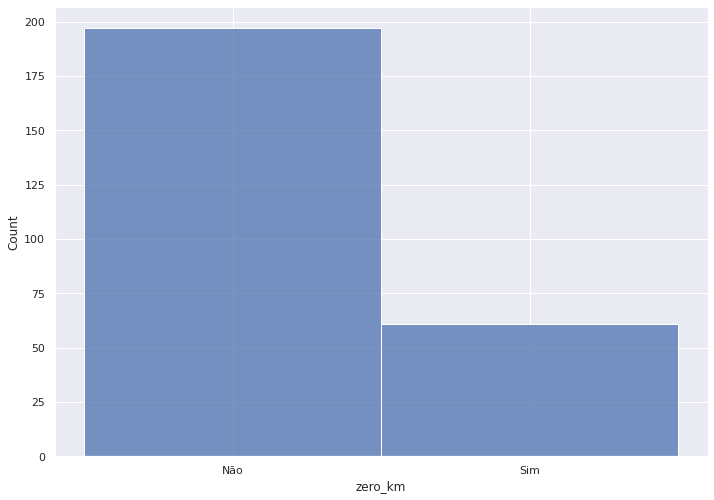

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #runtime configuration
sns.histplot(dados,x=dados.zero_km)

#Gráfico de dispersão

In [ ]:
px.scatter(dados.motor)


#Gráfico de barras

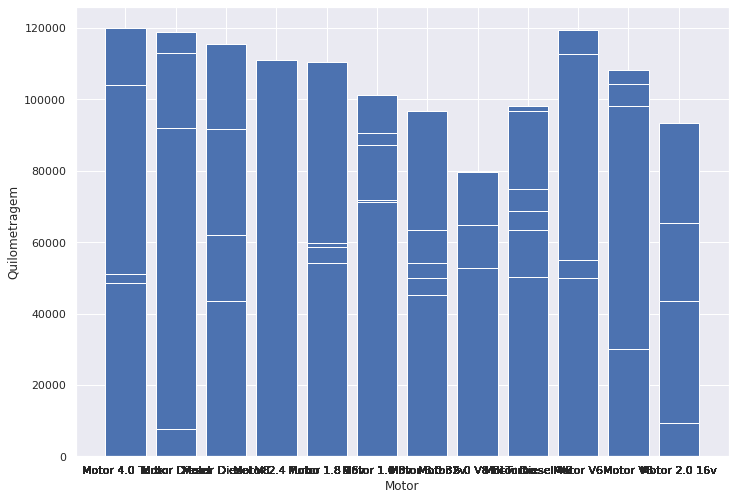

In [ ]:
pyplot.bar(dados.motor, dados.quilometragem)
pyplot.xticks(dados.motor)
pyplot.ylabel('Quilometragem')
pyplot.xlabel('Motor')
pyplot.show()


#Gráfico de linhas

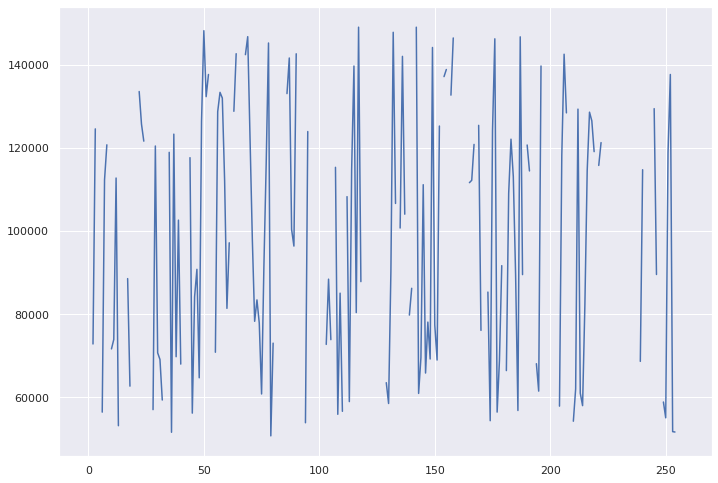

In [ ]:
pyplot.plot(dados.valor)
pyplot.show()
